In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Load the .csv files into Data Frames.

jun2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201906-citibike-tripdata.csv')
may2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201905-citibike-tripdata.csv')
apr2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201904-citibike-tripdata.csv')
mar2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201903-citibike-tripdata.csv')
feb2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201902-citibike-tripdata.csv')
jan2019=pd.read_csv('C:/Users/andre/OneDrive/Documents/CitiBikeData/201901-citibike-tripdata.csv')

In [3]:
# Load the individual Data Frames into one Data Frame using .append().

dataset=jun2019
dataset=dataset.append(may2019)
dataset=dataset.append(apr2019)
dataset=dataset.append(mar2019)
dataset=dataset.append(feb2019)
dataset=dataset.append(jan2019)

In [4]:
# Put the data in chronological order based on 'starttime'.

dataset=dataset.sort_values('starttime') 
dataset.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1


In [5]:
# Reset the Data Frame Index. Confirm that indexing is now correct and view the data types that are present.

dataset=dataset.reset_index()
dataset=dataset.drop('index', axis=1)
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055018 entries, 0 to 9055017
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.0+ GB


In [6]:
# Find the NaN values in the Data Frame.

dataset.isna().sum() 

tripduration                0
starttime                   0
stoptime                    0
start station id           37
start station name         37
start station latitude      0
start station longitude     0
end station id             37
end station name           37
end station latitude        0
end station longitude       0
bikeid                      0
usertype                    0
birth year                  0
gender                      0
dtype: int64

In [7]:
# Isolate the NaN values in the 'start station id' column to see if the other NaN values occur in the same rows.

NaN=dataset[dataset['start station id'].isna()==True] 

In [8]:
# As per the output below, all 37 NaN values have been accounted by filtering 'start station id' column for 'NaN'.

NaN.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 248490 to 3128056
Data columns (total 15 columns):
tripduration               37 non-null int64
starttime                  37 non-null object
stoptime                   37 non-null object
start station id           0 non-null float64
start station name         0 non-null object
start station latitude     37 non-null float64
start station longitude    37 non-null float64
end station id             0 non-null float64
end station name           0 non-null object
end station latitude       37 non-null float64
end station longitude      37 non-null float64
bikeid                     37 non-null int64
usertype                   37 non-null object
birth year                 37 non-null int64
gender                     37 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 4.6+ KB


In [9]:
# Delete the 37 rows with NaN values and reset the Data Frame index.

dataset=dataset.dropna() 
dataset=dataset.reset_index()
dataset=dataset.drop('index', axis=1)

In [10]:
# Convert the 'starttime' and 'stoptime' columns to datetime format.

dataset['starttime'] = dataset.loc[:,'starttime'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))
dataset['stoptime'] = dataset.loc[:,'stoptime'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))

In [11]:
# View Data Frame info.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9054981 entries, 0 to 9054980
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(3)
memory usage: 1.0+ GB


In [12]:
# The data set no longer contains 'NaN' values and the columns have been set to an appropriate data type for analysis purposes.
# Next, a column by column asssessment of the Data Frame to find and address outliers and values that do not make sense will be
# performed.

In [13]:
# 'bikeid' Column Assessment.

# This column represents the ID number for an individual bike. This column will likely not be used for cluster analysis.
# However, .nunique() was applied to the data to confirm that the number of bikes was not unreasonable.

dataset['bikeid'].nunique()

16969

In [14]:
# 'usertype' Column Assessment.

# Citi Bike has two types of uses. "Subscriber" represents users with annual memberships and "Customer" represents users who
# have short term passes such as 24-hour or 3-day. As per value counts, only two categories were returned and 88% of the users
# are subscribers. 

dataset['usertype'].value_counts()

Subscriber    7964965
Customer      1090016
Name: usertype, dtype: int64

In [15]:
# 'gender' Column Assessment.  

# Citi Bike has three categories for 'gender'. 0 for unknown, 1 for male and 2 for female. As per value counts, only values of
# 0, 1 & 2 were returned. 70% of users are male, 23% of users are female and for 7% of users have 'unknown' gender. 

dataset['gender'].value_counts()

1    6304602
2    2102794
0     647585
Name: gender, dtype: int64

In [16]:
# 'birth year' Column Assessment.

# The minimum 'birth year' is 1857. This is clearly an incorrectly reported 'birth year' as humans do not live that long.
# The minimum 'birth year' is 2003. The youngest user is 16 years old. This is in alignment with Citi Bike minimum age policy.
# The mean 'birth year' is 1979 and the median 'birth year' is 1982.

dataset['birth year'].describe()

count    9.054981e+06
mean     1.979712e+03
std      1.208265e+01
min      1.857000e+03
25%      1.969000e+03
50%      1.982000e+03
75%      1.990000e+03
max      2.003000e+03
Name: birth year, dtype: float64

In [17]:
# Lets create 'age' as it is easier to visualize and understand than 'birth year'.

age=2019-dataset['birth year']

In [18]:
age.describe()

count    9.054981e+06
mean     3.928836e+01
std      1.208265e+01
min      1.600000e+01
25%      2.900000e+01
50%      3.700000e+01
75%      5.000000e+01
max      1.620000e+02
Name: birth year, dtype: float64

In [19]:
# Let's take a closer look at the percentiles for age.

# 99% of users are 69 years of age or less.
# 99.9% of user are 82 years of age or less.
# 99.95% of users are 107 years of age or younger. This means that  (0.05% * 9,054,981) = 4527 rides were taken by users
# with an age greater than 107. It is highly unlikley that people who are 107 years of age or more are riding these bikes.

x=[.8,.9,.95,.975,.99,.995,.999,.9995]
f=[0,0,0,0,0,0,0,0]

for i,j in enumerate(x):
    f[i] = age.quantile(j)
    print(x[i]*100,'%:', f[i])

80.0 %: 50.0
90.0 %: 56.0
95.0 %: 61.0
97.5 %: 65.0
99.0 %: 69.0
99.5 %: 72.0
99.9 %: 82.0
99.95 %: 107.0


In [20]:
# Based on the percentiles above and the fact that life expectancy in USA is around 79, all rides taken by people greater than 
# 80 years of age will be removed. This deletion will remove ages that have a high probability of being false.

dataset.drop(dataset[dataset['birth year'] <1939].index, inplace = True) 

In [21]:
dataset['birth year'].describe()

count    9.043455e+06
mean     1.979789e+03
std      1.187467e+01
min      1.939000e+03
25%      1.969000e+03
50%      1.982000e+03
75%      1.990000e+03
max      2.003000e+03
Name: birth year, dtype: float64

In [22]:
# 'tripduration' Column Assessment.

# First, we test to see if 'tripduration' column matches the difference between the 'starttime' and 'stoptime' columns.

# There are 111 entries where the difference between 'starttime' and 'stoptime' is 3600 seconds (1 hour) greater than the 
# 'tripduration' value.

dataset['delta']=dataset['stoptime']-dataset['starttime']
dataset['delta']=dataset['delta'].dt.total_seconds() 
dataset['delta']=dataset['delta'].astype('int64')
dataset['diff']=dataset['delta']-dataset['tripduration']
dataset['diff'].value_counts()

0       9043344
3600        111
Name: diff, dtype: int64

In [23]:
# setting 'tripduration' equal to 'delta' will readily correct this issue.

dataset['tripduration']=dataset['delta']

In [24]:
# Let's get rid of 'delta' and 'diff' columns as they are not longer needed.

dataset.drop(dataset[['delta','diff']], axis=1, inplace = True) 

In [25]:
# From https://help.citibikenyc.com/hc/en-us/articles/115007359668-There-s-an-unknown-charge-in-my-account:

# "Lost Bike Charge - If you have kept a bike out for more than 24 hours at a time, it is considered lost or stolen 
# and there is a fee of $1200 (+ tax). This can also happen if you did not dock your bike properly, so your ride 
# stayed open, and someone else took the bike and has not returned it."

# Based on the "Lost Bike Charge" policy and the docking issue described, all durations greater than 24 hours will be removed.

dataset.drop(dataset[dataset['tripduration'] >86400].index, inplace = True) 

In [26]:
# Let's see what the data looks like now that all trips over 24 hours have been removed.

# Min = 61s. (Citi Bike indicated on their website that all trips under 1 minute were removed from the data as they were 
# assumed to be false starts or users redocking a bike to confirm that it is secure.)

# Mean = 850s (14.2 minutes) and Median = 598s (~10 minutes) and std = 1447s (24.11 minutes)

dataset['tripduration'].describe()

count    9.040227e+06
mean     8.506236e+02
std      1.447649e+03
min      6.100000e+01
25%      3.510000e+02
50%      5.980000e+02
75%      1.059000e+03
max      8.639200e+04
Name: tripduration, dtype: float64

In [27]:
# Lets take a look at the higher percentile values.

# 80% of all trips are 20 minutes or less.
# 99% of all trips are 57.5 minutes or less.

x=[.80,.85,.90,.95,.96,.97,.98,.99,.9925,.9950,.9975]
f=[0,0,0,0,0,0,0,0,0,0,0]

for i,j in enumerate(x):
    f[i] = dataset['tripduration'].quantile(j)
    print(x[i]*100,'%:', f[i])

80.0 %: 1217.0
85.0 %: 1414.0
90.0 %: 1671.0
95.0 %: 2104.0
96.0 %: 2245.0
97.0 %: 2423.0
98.0 %: 2676.0
99.0 %: 3451.0
99.25 %: 3934.0
99.5 %: 4864.0
99.75 %: 7305.4350000005215


Text(0, 0.5, 'Cummulative Probability')

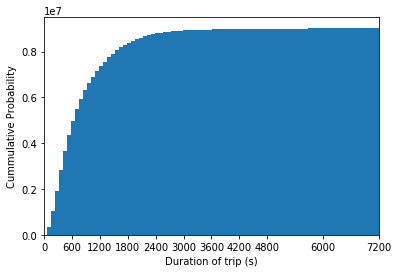

In [28]:
# Cummulative distribution plot

plt.hist(x=dataset['tripduration'],bins=1000,cumulative=True)
plt.xticks([0,600,1200,1800,2400,3000,3600,4200,4800,6000,7200])
plt.xlim(0, 7200)
plt.xlabel('Duration of trip (s)')
plt.ylabel('Cummulative Probability')

Text(0, 0.5, 'Number of Occurrences')

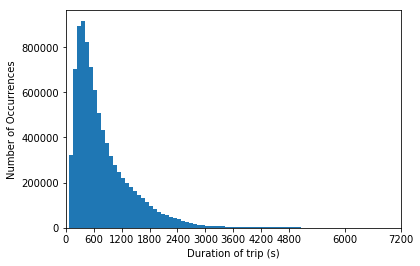

In [29]:
# Histogram of trips.

plt.hist(x=dataset['tripduration'],bins=1000)
plt.xticks([0,600,1200,1800,2400,3000,3600,4200,4800,6000,7200])
plt.xlim(0, 7200)
plt.xlabel('Duration of trip (s)')
plt.ylabel('Number of Occurrences')

In [30]:
# Based on the information shown above, lets remove all trips greater than 1 hour.
# Such a removal will get rid of approximately 1% of the data.

# Rationale: As per Citi Bike website, 30 minute rides are included in the cost of the pass for 24-hour and 3-day pass holders.
# If a ride goes beyond 30 minutes, late charges of $4.00 for each additional 15 minutes are applied. For the annual subscribers,
# 45 minute rides are allowed. If a ride exceeds 45 minutes, then late charges of $2.50 for each additional 15 minutes are applied. 
# 
# Based on this fee structure, annual subscribers who take out a bike for an entire hour are charged 2.50 in late fees.
# If a pass holder takes out a bike for one hour, they are charged 8.00 in late fees.
# Thus, a two hour bike trip would result in 12.50 and 20.00 in late charges for annual subscribers and pass holders respectively.
# Due to the availability of bikes and the close promixity of stations to each other, the user is better off just swapping
# bikes to initiate a new trip prior to exceeding the time limit rather than incurring late charges.
#
# As the reported duration of the trip increases, the likelihood that the bike was incorrectly docked and then used by a
# second user increases. Thus, it is suspected that many trips beyond one hour are the result of improperly docked bikes 
# being taken by a second user and then returned to a different station.
# 
# Thus, removing all trips over one hour has been deemed to be reasonable. 

dataset.drop(dataset[dataset['tripduration'] >3600].index, inplace = True) 

In [31]:
# 'starttime' Column Assessment

# All start times are within the six month time frame that the data is supposed to cover.
# First and last start time are very close to start and end of the range.

dataset['starttime'].describe()

count                        8958600
unique                       8953853
top       2019-04-08 17:01:41.695000
freq                               3
first     2019-01-01 00:01:47.401000
last      2019-06-30 23:59:54.367000
Name: starttime, dtype: object

In [32]:
# 'stoptime' Column Assessment  

# Some of the trips that have a 'starttime' inside the six month range have a 'stoptime' outside of the six month range.

dataset['stoptime'].describe()

count                        8958600
unique                       8953778
top       2019-06-03 08:53:45.694000
freq                               3
first     2019-01-01 00:07:07.581000
last      2019-07-01 00:41:33.019000
Name: stoptime, dtype: object

In [33]:
# For simplicity in describing the dataset, lets get rid of the trips that end outside of the six month range.
# The dataset can then be descibed as "all trips less than one hour starting and ending between January 1, 2019 and June 30,
# 2019 inclusive".

dataset.drop(dataset[dataset['stoptime'] >= '2019-07-01 00:00:00'].index, inplace = True) 

In [34]:
# As per below, only 248 trips have been removed.

dataset['stoptime'].describe()

count                        8958352
unique                       8953530
top       2019-06-03 08:53:45.694000
freq                               3
first     2019-01-01 00:07:07.581000
last      2019-06-30 23:59:58.809000
Name: stoptime, dtype: object

In [35]:
# 'start station id', 'start station name', 'start station latitude','start station longitude' Column Assessments.    

# There are 820 'start station id' values.

dataset['start station id'].nunique()

820

In [36]:
# There are 821 'start station name' values despite the fact that there are only 820 'start station id' values.

dataset['start station name'].nunique()

821

In [37]:
# There are 822 'start station latitude' values despite the fact that there are only 820 'start station id' values.

dataset['start station latitude'].nunique()

822

In [38]:
# There are 822 'start station longitude' values despite the fact that there are only 820 'start station id' values.

dataset['start station longitude'].nunique()

822

In [39]:
# Let's investigate the discrepancies. 
# Unique combinations of 'start station id','start station name','start station latitude','start station longitude' are isolated 

sskey=dataset[['start station id','start station name','start station latitude','start station longitude']].copy()
sskey=sskey.drop_duplicates()

In [40]:
# Sort the unique combinations based on ascending 'start station id'.

# There are 825 unique combinations.

sskey.sort_values('start station id')
sskey=sskey.reset_index()
sskey=sskey.drop('index', axis=1)
sskey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
start station id           825 non-null float64
start station name         825 non-null object
start station latitude     825 non-null float64
start station longitude    825 non-null float64
dtypes: float64(3), object(1)
memory usage: 25.9+ KB


In [41]:
# Identify the repeat values of 'start station id' in the unique combinations.

sskey['start station id'].value_counts().head(6)

3243.0    2
243.0     2
3701.0    2
3466.0    2
3727.0    2
3567.0    1
Name: start station id, dtype: int64

In [42]:
# Identify the repeat values of 'start station name' in the unique combinations.

sskey['start station name'].value_counts().head(5)

Fulton St & Rockwell Pl    2
W 45 St & 6 Ave            2
Cliff St & Fulton St       2
Frost St & Meeker Ave      2
Bushwick Ave & Stagg St    1
Name: start station name, dtype: int64

In [43]:
# Identify the repeat values of 'start station latitude' in the unique combinations.

sskey['start station latitude'].value_counts().head(4)

40.756687    2
40.708318    2
40.758924    2
40.777057    1
Name: start station latitude, dtype: int64

In [44]:
# Identify the repeat values of 'start station longitude' in the unique combinations.

sskey['start station longitude'].value_counts().head(4)

-74.005041    2
-73.962262    2
-73.982577    2
-73.932145    1
Name: start station longitude, dtype: int64

In [45]:
# 'station start id' has the most duplicate values. This list will be used to isolate the unique combinations
# that have a 'station start id' that has been used more than once.

dup=[3243.0, 243.0, 3701.0, 3466.0, 3727.0]

In [46]:
# Print out of the duplicate unique combinations with 'station start id' duplicated.

# From the table below, we make the following observations:

# 243.0 - latitude and longitude are different. Station names are the same.
# 3243.0 - latitude and longitude are the same. Station names are different. 
# 3466.0 - latitude and longitude are the same. Station names are different. 
# 3701.0 - latitude and longitude are the same. Station names are different. 
# 3727.0 - latitude and longitude are different. Station names are the same.

pd.set_option("display.precision", 8)
ssDUP=sskey.loc[sskey['start station id'].isin(dup)==True].sort_values('start station id')
ssDUP=ssDUP.reset_index()
ssDUP=ssDUP.drop('index', axis=1)
ssDUP


,start station id,start station name,start station latitude,start station longitude
0,243.0,Fulton St & Rockwell Pl,40.68822600,-73.97938200
1,243.0,Fulton St & Rockwell Pl,40.68841000,-73.97945800
2,3243.0,E 58 St & 1 Ave,40.75892386,-73.96226227
3,3243.0,E 58 St & 1 Ave (NE Corner),40.75892386,-73.96226227
4,3466.0,W 45 St & 6 Ave,40.75668721,-73.98257732
5,3466.0,W 45 St & 6 Ave -,40.75668721,-73.98257732
6,3701.0,Cliff St & Fulton St,40.70831794,-74.00504082
7,3701.0,Cliff St & Fulton St (Old),40.70831794,-74.00504082
8,3727.0,Frost St & Meeker Ave,40.71784798,-73.94752018
9,3727.0,Frost St & Meeker Ave,40.71766197,-73.94880027


In [47]:
# For "clean data" purposes, stations with different coordinates should have different 'start station id' numbers. 
# We will not change 'start station names' as unique 'station start id' values are sufficient.
# Any filtering will be performed using 'start station id' column.

In [48]:
# Determine maximum 'start station id' so new id numbers can be established to apply to 243 and 3727 cases. 

# new id numbers will be 4444 and 5555. 

print(sskey['start station id'].max())

3795.0


In [49]:
# Save the latitude and longitude of the row 0 instance of 243 'start station id'

latsave=ssDUP.iloc[0,2]
longsave=ssDUP.iloc[0,3]
print(latsave)
print(longsave)

40.688226
-73.979382


In [50]:
# Assign '4444' to the 'start station id' for instances of 'start station id' 243.0 with latsave and longsave as its coordinates.

mask = (dataset['start station id'] == 243.0) & (dataset['start station latitude'] == latsave) & (dataset['start station longitude']==longsave)
dataset['start station id'] = dataset['start station id'].mask(mask, 4444)

In [51]:
# Save the latitude and longitude of the row 8 instance of 3727 'start station id'

latsave=ssDUP.iloc[8,2]
longsave=ssDUP.iloc[8,3]
print(latsave)
print(longsave)

40.71784798417728
-73.94752018153667


In [52]:
# Assign '5555' to the 'start station id' for instances of 'start station id' 3727 with latsave and longsave as its coordinates.

mask = (dataset['start station id'] == 3727.0) & (dataset['start station latitude'] == latsave) & (dataset['start station longitude']==longsave)
dataset['start station id'] = dataset['start station id'].mask(mask, 5555)

In [53]:
# Inspection of the ssDUP table indicates that two of the duplicate 'start station names' were 
# not captured when filtering for duplicate 'start station ids'. 

rep=['W 45 St & 6 Ave','Cliff St & Fulton St']

In [54]:
# Isolate and inspect the duplicate 'start station names'

# Cliff St & Fulton St - latitude and longitude are different. 
# W 45 St & 6 Ave - latitude and longitude are different. 

# On the basis that each of the four 'start station id' in the table below has a unique set of coordinates, these 'start station
# id' will be left "as is". 

snDUP=sskey.loc[sskey['start station name'].isin(rep)==True].sort_values('start station id')
snDUP=snDUP.reset_index()
snDUP=snDUP.drop('index', axis=1)
snDUP

,start station id,start station name,start station latitude,start station longitude
0,493.0,W 45 St & 6 Ave,40.75680010,-73.98291153
1,3466.0,W 45 St & 6 Ave,40.75668721,-73.98257732
2,3701.0,Cliff St & Fulton St,40.70831794,-74.00504082
3,3783.0,Cliff St & Fulton St,40.70838000,-74.00495000


In [55]:
# 'end station id', 'end station name', 'end station latitude','end station longitude' Column Assessments   

# There are 837 'end station id' values despite the fact that there are 820 'start station id' values.

dataset['end station id'].nunique()

837

In [56]:
# There are 838 'end station name' values despite the fact that there are only 837 'end station id' values.

dataset['end station name'].nunique()

838

In [57]:
# There are 839 'end station latitude' values despite the fact that there are only 837 'end station id' values.

dataset['end station latitude'].nunique()

839

In [58]:
# There are 839 'start station longitude' values despite the fact that there are only 837 'end station id' values.

dataset['end station longitude'].nunique()

839

In [59]:
# Let's investigate the discrepancies. 
# Unique combinations of 'end station id','end station name','end station latitude', 'end station longitude' are isolated.

eskey=dataset[['end station id','end station name','end station latitude','end station longitude']].copy()
eskey=eskey.drop_duplicates()

In [60]:
# Sort the unique combinations based on ascending 'end station id'.

# There are 842 unique combinations.

eskey.sort_values('end station id')
eskey=eskey.reset_index()
eskey=eskey.drop('index', axis=1)
eskey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 4 columns):
end station id           842 non-null float64
end station name         842 non-null object
end station latitude     842 non-null float64
end station longitude    842 non-null float64
dtypes: float64(3), object(1)
memory usage: 26.4+ KB


In [61]:
# Identify the repeat values of 'end station id' in the unique combinations.

eskey['end station id'].value_counts().head(6)

3466.0    2
3243.0    2
3727.0    2
3701.0    2
243.0     2
3395.0    1
Name: end station id, dtype: int64

In [62]:
# Identify the repeat values of 'end station name' in the unique combinations.

eskey['end station name'].value_counts().head(5)

W 45 St & 6 Ave            2
Frost St & Meeker Ave      2
Cliff St & Fulton St       2
Fulton St & Rockwell Pl    2
Union St & Bedford Ave     1
Name: end station name, dtype: int64

In [63]:
# Identify the repeat values of 'end station latitude' in the unique combinations.

eskey['end station latitude'].value_counts().head(4)

40.75892386    2
40.70831794    2
40.75668721    2
40.77705750    1
Name: end station latitude, dtype: int64

In [64]:
# Identify the repeat values of 'end station longitude' in the unique combinations.

eskey['end station longitude'].value_counts().head(4)

-73.96226227    2
-73.98257732    2
-74.00504082    2
-73.96648977    1
Name: end station longitude, dtype: int64

In [65]:
# 'end station id' has the most duplicate values. This list will be used to isolate the unique combinations
# that have a 'end station id' that has been used more than once.

dup=[3243.0, 243.0, 3701.0, 3466.0, 3727.0]

In [66]:
# Print out of the duplicate unique combinations with 'end station id' duplicated.

# This output appears to be the same output generated when assessing the duplicate unique combinations of 'start station id'
# in the ssDUP data frame.

esDUP=eskey.loc[eskey['end station id'].isin(dup)==True].sort_values('end station id')
esDUP=esDUP.reset_index()
esDUP=esDUP.drop('index', axis=1)
esDUP

,end station id,end station name,end station latitude,end station longitude
0,243.0,Fulton St & Rockwell Pl,40.68822600,-73.97938200
1,243.0,Fulton St & Rockwell Pl,40.68841000,-73.97945800
2,3243.0,E 58 St & 1 Ave,40.75892386,-73.96226227
3,3243.0,E 58 St & 1 Ave (NE Corner),40.75892386,-73.96226227
4,3466.0,W 45 St & 6 Ave,40.75668721,-73.98257732
5,3466.0,W 45 St & 6 Ave -,40.75668721,-73.98257732
6,3701.0,Cliff St & Fulton St,40.70831794,-74.00504082
7,3701.0,Cliff St & Fulton St (Old),40.70831794,-74.00504082
8,3727.0,Frost St & Meeker Ave,40.71784798,-73.94752018
9,3727.0,Frost St & Meeker Ave,40.71766197,-73.94880027


In [67]:
# We will compare the above table esDUP against ssDUP electronically.

# As per the output below, both tables are the same.

ssDUP.columns=[1,2,3,4]
esDUP.columns=[1,2,3,4]
esDUP.eq(ssDUP)

,1,2,3,4
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [68]:
# For "clean data" purposes, stations with different coordinates should have different 'end station id' numbers. 
# We will not change 'end station names' as unique 'end start id' values are sufficient.
# Any filtering will be performed using 'end station id' column.

In [69]:
# Determine maximum 'end station id' so new id numbers can be established to apply to 243 and 3727 cases.

print(eskey['end station id'].max())

3795.0


In [70]:
# Save the latitude and longitude of the row 0 instance of 243 'end station id'

latsave=esDUP.iloc[0,2]
longsave=esDUP.iloc[0,3]

In [71]:
# Assign '4444' to the 'end station id' for instances of 'end station id' 243 with latsave and longsave as its coordinates.

mask = (dataset['end station id'] == 243.0) & (dataset['end station latitude'] == latsave) & (dataset['end station longitude']==longsave)
dataset['end station id'] = dataset['end station id'].mask(mask, 4444)

In [72]:
# Save the latitude and longitude of the row 8 instance of 3727 'end station id'

latsave=esDUP.iloc[8,2]
longsave=esDUP.iloc[8,3]

In [73]:
# Assign '5555' to the 'end station id' for instances of 'end station id' 3727 with latsave and longsave as its coordinates.

mask = (dataset['end station id'] == 3727.0) & (dataset['end station latitude'] == latsave) & (dataset['end station longitude']==longsave)
dataset['end station id'] = dataset['end station id'].mask(mask, 5555)

In [74]:
# Inspection of the esDUP table indicates that two of the duplicate 'end station names' were 
# not captured when filtering for duplicate 'end station ids'. 

rep=['W 45 St & 6 Ave','Cliff St & Fulton St']

In [75]:
# Isolate and inspect the duplicate 'end station names'

# This output appears to be the same output generated when assessing duplicate start station names in snDUP data frame.

enDUP=eskey.loc[eskey['end station name'].isin(rep)==True].sort_values('end station id')
enDUP=enDUP.reset_index()
enDUP=enDUP.drop('index', axis=1)
enDUP

,end station id,end station name,end station latitude,end station longitude
0,493.0,W 45 St & 6 Ave,40.75680010,-73.98291153
1,3466.0,W 45 St & 6 Ave,40.75668721,-73.98257732
2,3701.0,Cliff St & Fulton St,40.70831794,-74.00504082
3,3783.0,Cliff St & Fulton St,40.70838000,-74.00495000


In [76]:
# We will compare the enDUP against snDUP electronically.

# As per the output below, both tables are the same.

snDUP.columns=[1,2,3,4]
enDUP.columns=[1,2,3,4]
enDUP.eq(snDUP)

,1,2,3,4
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


In [77]:
# Identify the 'end station id' values that are not present in the list of 'start station id' values.

# There are 17 stations which were end points for trips but were not starting points for trips
# These 17 stations were searched in the Citi Bike 'Find a station' search engine (https://member.citibikenyc.com/map/).
# 'Cadman Plaza E & Tillary St' is in Brooklyn and 'NYCBS Depot BAL - DYR' didn't return a result.
# The remaining 15 stations were located on the west side of the Hudson River in New Jersy.

esIDnotinssID=eskey[eskey['end station id'].isin(sskey['start station id'])==False]
esIDnotinssID

,end station id,end station name,end station latitude,end station longitude
756,3639.0,Harborside,40.71925170,-74.03423400
760,3184.0,Paulus Hook,40.71414540,-74.03355190
762,3275.0,Columbus Drive,40.71835520,-74.03891444
763,232.0,Cadman Plaza E & Tillary St,40.69597683,-73.99014892
768,3240.0,NYCBS Depot BAL - DYR,40.75903008,-73.99385870
770,3211.0,Newark Ave,40.72152515,-74.04630454
775,3214.0,Essex Light Rail,40.71277420,-74.03648570
779,3196.0,Riverview Park,40.74431870,-74.04399090
791,3267.0,Morris Canal,40.71241882,-74.03852552
810,3199.0,Newport Pkwy,40.72874480,-74.03210820


In [78]:
# Identify the 'start station id' values that are not present in the list of 'end station id' values.

# There are no stations which were start points for trips but were not end points for trips.

ssIDnotinesID=sskey[sskey['start station id'].isin(eskey['end station id'])==False]
ssIDnotinesID

,start station id,start station name,start station latitude,start station longitude


In [79]:
# Identify how many trips ended at the 17 stations that didn't have trips originating from them.

# There are only 31 trips ending at these 17 stations.

endstation=dataset[dataset['end station id'].isin(esIDnotinssID['end station id'])==True].sort_values('end station id')
endstation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 208617 to 7130430
Data columns (total 15 columns):
tripduration               31 non-null int64
starttime                  31 non-null datetime64[ns]
stoptime                   31 non-null datetime64[ns]
start station id           31 non-null float64
start station name         31 non-null object
start station latitude     31 non-null float64
start station longitude    31 non-null float64
end station id             31 non-null float64
end station name           31 non-null object
end station latitude       31 non-null float64
end station longitude      31 non-null float64
bikeid                     31 non-null int64
usertype                   31 non-null object
birth year                 31 non-null int64
gender                     31 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(3)
memory usage: 3.9+ KB


In [80]:
# It is likely that trips starting from these 17 stations occurred but are missing from the data set.
# The number of trips involving these 17 stations is only 31.
# Thus, there isn't enough information to properly profile these stations.
# The 31 trips ending at these 17 stations will be deleted.

dataset.drop(dataset[dataset['end station name'].isin(endstation['end station name']) == True].index, inplace = True) 

In [81]:
# Final Check of start station and end station  data wrangling.

# This check confirms that the same unique combinations of id, name, latitude and longitude are present in both the start station
# and end station data.

sscheck=dataset[['start station id','start station name','start station latitude','start station longitude']].copy().sort_values('start station id')
escheck=dataset[['end station id','end station name','end station latitude','end station longitude']].copy().sort_values('end station id')

sscheck=sscheck.drop_duplicates()
escheck=escheck.drop_duplicates()

sscheck=sscheck.reset_index()
sscheck=sscheck.drop('index', axis=1)

escheck=escheck.reset_index()
escheck=escheck.drop('index', axis=1)

sscheck.columns=['a','b','c','d']
escheck.columns=['a','b','c','d']

checkmatrix=sscheck.eq(escheck)
print(checkmatrix['a'].value_counts())
print(checkmatrix['b'].value_counts())
print(checkmatrix['c'].value_counts())
print(checkmatrix['d'].value_counts())

True    825
Name: a, dtype: int64
True    825
Name: b, dtype: int64
True    825
Name: c, dtype: int64
True    825
Name: d, dtype: int64


In [82]:
# Final assessment of latitude and longitude values - are the value ranges reasonable?

In [83]:
# Identify maximum and minimum values for latitude and longitude.

latmax=dataset['start station latitude'].max()
latmin=dataset['start station latitude'].min()
lonmax=dataset['start station longitude'].max()
lonmin=dataset['start station longitude'].min()

In [84]:
# Identify the station associated with each of the four points established.

print(sskey[sskey['start station latitude']==latmax])
print(sskey[sskey['start station latitude']==latmin])
print(sskey[sskey['start station longitude']==lonmax])
print(sskey[sskey['start station longitude']==lonmin])

     start station id      start station name  start station latitude  \
686            3649.0  W 129 St & Convent Ave             40.81439444   

     start station longitude  
686             -73.95324737  
     start station id                             start station name  \
386            3477.0  39 St & 2 Ave - Citi Bike HQ at Industry City   

     start station latitude  start station longitude  
386             40.65539977             -74.01062787  
     start station id    start station name  start station latitude  \
606            3528.0  Steinway St & 23 Ave              40.7713937   

     start station longitude  
606              -73.9077436  
     start station id start station name  start station latitude  \
804            3479.0       Picnic Point              40.6851256   

     start station longitude  
804             -74.02535319  


In [85]:
# These four stations were searched in the Citi Bike 'Find a station' search engine (https://member.citibikenyc.com/map/)

# 'latmax' station: 'W 129 St & Convent Ave' was visually found to be the station on the map that was furthest north.
# 'latmin' station: '39 St & 2 Ave - Citi Bike HQ at Industry City' was visually found to be the station that was furthest south.
# 'lonmax' station: 'Steinway St & 23 Ave' was visually found to be the most eastern station on the map.
# 'lonmin' station: 'Picnic Point' which is located on Governor's island was found to be the most western station located in
# New York City. The 50 stations to the west of this station are located in New Jersey. Fifteen New Jersey stations were previously
# deleted from the data set as they had trips ending at them but no trips starting at them and were assumed to be missing data.
